In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('Ind_Bowlers.xlsx')

In [3]:
df

,Name,Year,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,BBM,Avg,Econ,SR,5w,10w
0,Ishant Sharma,1,2,4,52.1,15,189,6,5/118,5/140,31.50,3.62,52.1,1,0
1,Ishant Sharma,2,13,22,392.3,67,1201,38,4/77,7/117,31.60,3.05,61.9,0,0
2,Ishant Sharma,3,4,6,127.2,21,469,10,4/73,4/135,46.90,3.68,76.4,0,0
3,Ishant Sharma,4,11,20,323.4,56,1240,33,4/43,7/58,37.57,3.83,58.8,0,0
4,Ishant Sharma,5,12,22,487.5,100,1578,43,6/55,10/108,36.69,3.23,68.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Umesh Yadav,8,4,8,88.4,14,314,23,5/53,8/82,13.65,3.54,23.1,1,0
78,Umesh Yadav,9,3,6,71.4,13,224,6,3/40,3/89,37.33,3.12,71.6,0,0
79,Umesh Yadav,10,3,6,77.2,12,246,8,3/60,6/136,30.75,3.18,58.0,0,0
80,Umesh Yadav,11,3,6,72.0,12,217,9,4/25,5/57,24.11,3.01,48.0,0,0


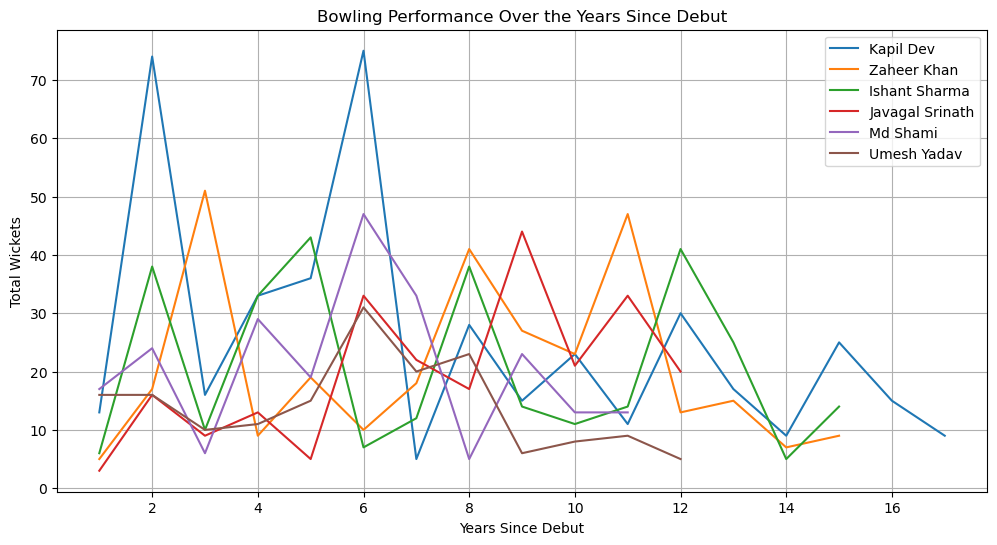

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Year' is in a suitable format (e.g., integer) for numerical comparison
# If not, convert it to an integer using df['Year'] = df['Year'].astype(int)

# Grouping and Aggregation by 'Year' for each player
grouped = df.groupby(['Name', 'Year']).agg({'Wkts': 'sum', 'Runs': 'sum', 'Inns': 'count'})

# Reset index to make 'Name' and 'Year' columns
grouped.reset_index(inplace=True)

# Plotting performance trends for select players
players_to_plot = ['Kapil Dev', 'Zaheer Khan', 'Ishant Sharma', 'Javagal Srinath', 'Md Shami', 'Umesh Yadav']  # Replace with the actual player names
plt.figure(figsize=(12, 6))  # Adjust figure size

for player in players_to_plot:
    player_data = grouped[grouped['Name'] == player]
    plt.plot(player_data['Year'], player_data['Wkts'], label=player)

plt.xlabel('Years Since Debut')
plt.ylabel('Total Wickets')
plt.title('Bowling Performance Over the Years Since Debut')
plt.grid(True)
plt.legend()
plt.show()


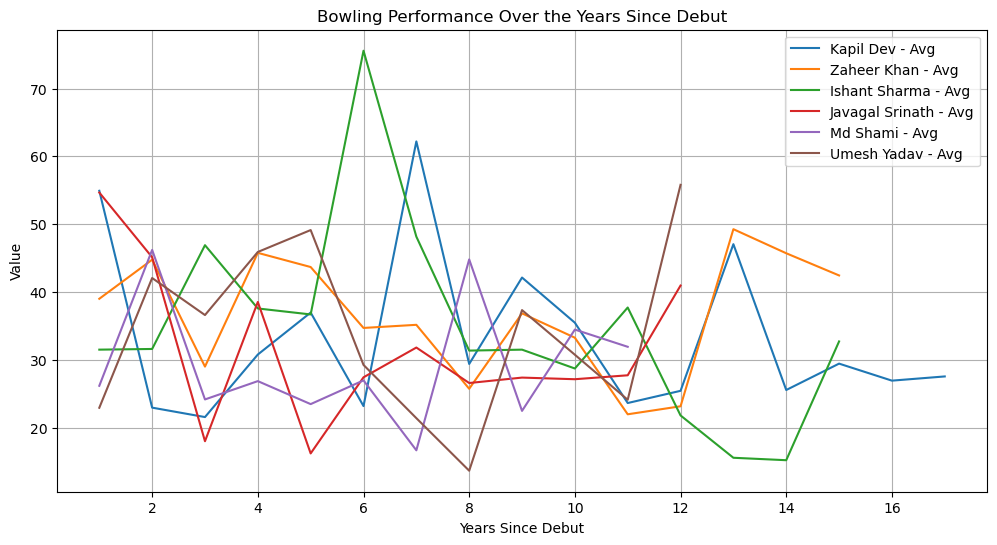

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Year' is in a suitable format (e.g., integer) for numerical comparison
# If not, convert it to an integer using df['Year'] = df['Year'].astype(int)

# Grouping and Aggregation by 'Year' for each player
grouped = df.groupby(['Name', 'Year']).agg({'Wkts': 'sum', 'Runs': 'sum', 'Inns': 'count', 'Avg': 'mean', 'SR': 'mean'})

# Reset index to make 'Name' and 'Year' columns
grouped.reset_index(inplace=True)

# Plotting performance trends for select players
players_to_plot = ['Kapil Dev', 'Zaheer Khan', 'Ishant Sharma', 'Javagal Srinath', 'Md Shami', 'Umesh Yadav']  # Replace with the actual player names
plt.figure(figsize=(12, 6))  # Adjust figure size

for player in players_to_plot:
    player_data = grouped[grouped['Name'] == player]
    
    # Plotting Average (Avg)
    plt.plot(player_data['Year'], player_data['Avg'], label=f'{player} - Avg')
    
#     # Plotting Strike Rate (SR)
#     plt.plot(player_data['Year'], player_data['SR'], label=f'{player} - SR')
    
#     # Plotting Wickets (Wkts)
#     plt.plot(player_data['Year'], player_data['Wkts'], label=f'{player} - Wkts')

plt.xlabel('Years Since Debut')
plt.ylabel('Value')
plt.title('Bowling Performance Over the Years Since Debut')
plt.grid(True)
plt.legend()
plt.show()


In [8]:
!pip install pandas plotly dash

In [9]:
pip install openpyxl

In [11]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

# Load your dataset from an Excel file
df = pd.read_excel('Ind_Bowlers.xlsx', sheet_name='Sheet2')  # Replace with your file path and sheet name

app = dash.Dash(__name__)

# Define the layout of your app
app.layout = html.Div([
    html.H1('Indian Fast Bowlers Bowling Performance'),
    dcc.Dropdown(
        id='player-dropdown',
        options=[{'label': player, 'value': player} for player in df['Name'].unique()],
        value=['Player1'],  # Default selected players
        multi=True
    ),
    dcc.Graph(id='performance-plot')
])

# Define a callback to update the plot based on player selection
@app.callback(
    Output('performance-plot', 'figure'),
    [Input('player-dropdown', 'value')]
)
def update_plot(selected_players):
    # Filter the dataset for selected players
    filtered_df = df[df['Name'].isin(selected_players)]

    # Create a line plot using Plotly Express
    fig = px.line(
        filtered_df,
        x='Year',
        y=['Avg'],
        color='Name',
        labels={'Name': 'Player'},
        title='Bowling Performance Over the Years',
        markers=True
    )

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

ImportError: cannot import name 'escape' from 'jinja2' (C:\Users\inkdb\anaconda3\lib\site-packages\jinja2\__init__.py)

In [12]:
from markupsafe import escape

In [13]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

# Load your dataset from an Excel file
df = pd.read_excel('Ind_Bowlers.xlsx', sheet_name='Sheet2')  # Replace with your file path and sheet name

app = dash.Dash(__name__)

# Define the layout of your app
app.layout = html.Div([
    html.H1('Indian Fast Bowlers Bowling Performance'),
    dcc.Dropdown(
        id='player-dropdown',
        options=[{'label': player, 'value': player} for player in df['Name'].unique()],
        value=['Player1'],  # Default selected players
        multi=True
    ),
    dcc.Graph(id='performance-plot')
])

# Define a callback to update the plot based on player selection
@app.callback(
    Output('performance-plot', 'figure'),
    [Input('player-dropdown', 'value')]
)
def update_plot(selected_players):
    # Filter the dataset for selected players
    filtered_df = df[df['Name'].isin(selected_players)]

    # Create a line plot using Plotly Express
    fig = px.line(
        filtered_df,
        x='Year',
        y=['Avg'],
        color='Name',
        labels={'Name': 'Player'},
        title='Bowling Performance Over the Years',
        markers=True
    )

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

ImportError: cannot import name 'escape' from 'jinja2' (C:\Users\inkdb\anaconda3\lib\site-packages\jinja2\__init__.py)

In [14]:
!pip install flask==2.2.2

  Using cached Flask-2.2.2-py3-none-any.whl (101 kB)
     -------------------------------------- 242.2/242.2 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.0.3
    Uninstalling Werkzeug-2.0.3:
      Successfully uninstalled Werkzeug-2.0.3
  Attempting uninstall: flask
    Found existing installation: Flask 1.1.2
    Uninstalling Flask-1.1.2:
      Successfully uninstalled Flask-1.1.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
distributed 2022.7.0 requires tornado<6.2,>=6.0.3, but you have tornado 6.3.3 which is incompatible.
dash 2.13.0 requires Werkzeug<2.3.0, but you have werkzeug 2.3.7 which is incompatible.


In [1]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

# Load your dataset from an Excel file
df = pd.read_excel('Ind_Bowlers.xlsx', sheet_name='Sheet2')  # Replace with your file path and sheet name

app = dash.Dash(__name__)

# Define the layout of your app
app.layout = html.Div([
    html.H1('Indian Fast Bowlers Bowling Performance'),
    dcc.Dropdown(
        id='player-dropdown',
        options=[{'label': player, 'value': player} for player in df['Name'].unique()],
        value=['Player1'],  # Default selected players
        multi=True
    ),
    dcc.Graph(id='performance-plot')
])

# Define a callback to update the plot based on player selection
@app.callback(
    Output('performance-plot', 'figure'),
    [Input('player-dropdown', 'value')]
)
def update_plot(selected_players):
    # Filter the dataset for selected players
    filtered_df = df[df['Name'].isin(selected_players)]

    # Create a line plot using Plotly Express
    fig = px.line(
        filtered_df,
        x='Year',
        y=['Avg'],
        color='Name',
        labels={'Name': 'Player'},
        title='Bowling Performance Over the Years',
        markers=True
    )

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

C:\Users\inkdb\AppData\Local\Temp\ipykernel_7032\917336088.py:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\inkdb\AppData\Local\Temp\ipykernel_7032\917336088.py:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
